IMT 2200 - Introducción a Ciencia de Datos<br>
**Pontificia Universidad Católica de Chile**<br>
**Instituto de Ingeniería Matemática y Computacional**<br>
**Semestre 2025-S2**<br>
**Profesor:** Rodrigo A. Carrasco <br>

---

## Tarea 01 – Cargando y Analizando Datos

- **Fecha de Entrega:** martes 26 de agosto de 2025, a las 23:59.
- 
**Formato de entrega:** Notebook ejecutado y comentado (`.ipynb`) en l emódulo de Tara 01 habilitado en Canvas.




## Instrucciones

- Esta Tarea debe desarrollarse de manera totalmente *individual*, de acuerdo a lo establecido en la sección de Integridad Académica en el programa del curso.
- La Tarea debe ser desarrollada en lenguaje de programación Python y la entrega en formato Jupyter Notebook.
- El desarrollo del Notebook debe ser claro y ordenado, incluyendo anotaciones (markdown) y comentarios que permitan seguir fácilmente el código y los pasos implementados a los correctores, y siguiendo buenas prácticas de programación. La presentación y claridad del notebook y código forman parte de la evaluación de la tarea.
- Notebook **autocontenible** que:
   - Ejecute sin errores todas las celdas.
  - Contenga tanto el código como los comentarios y explicaciones necesarias.
  - Incluya visualizaciones claras y correctamente etiquetadas.
- No se aceptarán notebooks con celdas rotas o que dependan de rutas externas no indicadas en la tara.

- Deben hacer sus consultas y comentarios sobre la Tarea a traves del canal de Tareas en eo del curso en Canvas.os.
cteriza.

## 1. Objetivos

- Aplicar los conceptos iniciales de manejo de datos y análisis exploratorio vistos en clases.
- Practicar la lectura, limpieza y manipulación de datos en Python.
- Desarrollar habilidades para visualizar y describir patrones y tendencias en conjuntos de datos reales.
- Fomentar la capacidad de comunicar resultados de forma clara y fundamentada.

### 1.1 Objetivo educacional

Esta Tarea tiene como objetivo que los estudiantes desarrollen la capacidad de manejar algunas de las librerías centrales para el desarrollo de Ciencia de Datos, con foco en la lectura y exploración de datos. 

Para los ejercicios a continuación, usted deberá leer, inspeccionar, manipular y graficar conjuntos de datos en distintos formatos, de manera de responder las preguntas de cada parte de la Tarea.

### 1.2 Pregunta de ciencia de datos

Para esta tarea, tendremos como objetivo comprender cómo han cambiado los juegos de mesa en los últimos 40 años. Específicamente queremos saber qué tipos de juegos se han vuelto más comunes hoy en día y qué los caracteriza.

### 1.3 Recomendaciones
- Utiliza las librerías sugeridas en el notebook o justifica brevemente si incorporas otras.
- Revisa que todas las celdas se ejecuten en orden, desde el inicio, sin errores.
- Comenta tu código para explicar qué hace cada sección relevante.
- Asegúrate de que las visualizaciones sean fáciles de interpretar y tengan títulos y etiquetas adecuados.

## 2. Datos

Estaremos utilizando información extraída desde [BoardGameGeek.com](https://boardgamegeek.com/), una plataforma para aficionados de los juegos de mesa, que permite a sus usuarios registrar, calificar e intercambiar sus juegos favoritos. Actualmente, BGG es una de las bases de datos más extensa y diversa de juegos de mesa.

El dataset con el que trabajaremos consiste en un grupo de archivos CSV que contienen información sobre más de 100.000 juegos de mesa almacenados en la plataforma. Este puede descargarse directamente desde el siguiente enlace: https://www.kaggle.com/datasets/mshepherd/board-games Para descargar los datos, haga click en el botón de **Download**, donde podrá descargar los archivos como `.zip`, o bien utilizar la API de Kaggle.

Para el desarrollo de esta tarea, solo utilizaremos los archivos con el prefijo `bgg_`.

**Si utiliza la API de Kaggle para descargar los datos, deje el código utilizado en la siguiente celda:**

In [ ]:
# Descarga de datos desde Kaggle

### 2.1 Librerías

Para esta tarea recomendamos al menos usar las librerías indicadas en la siguiente celda del Notebook. Puede agregar otras si lo estima conveniente para responder de mejor forma las preguntas de la Tarea.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 3. Desarrollo

Para cada una de las siguientes preguntas o actividades incluya una o más celdas de código y Markdown con las respuestas o comentarios necesarios para contestar la pregunta o lograr la actividad. Agregue sus celdas a continuación de cada pregunta para que el Notebook quede ordenado.

En el caso de gráficos, figuras o tablas, asegúrese que todas tengan título, etiquetas en los ejes o haya claridad de los contenidos.

### 3.1 DataFrame unificado (1 punto)

Vamos a cargar en un DataFrame los datos de juegos guardados en el documento `bgg_GameItem.csv`. Al inspeccionar nuestros datos, podemos notar que los valores de ciertas columnas vienen "codificados" con ID. Para comenzar, vamos a juntar la información de los distintos archivos descargados.

**a) (0.8 pts)** Genere un DataFrame único con toda la información de cada juego, incluyendo: nombres de artistas y diseñadores involucrados, mecánicas, categorías, tipo, familia y editorial. Guarde este DataFrame en un nuevo archivo CSV.

In [136]:

#creo los dataframes, abriendo los archivos

df_gameitem= pd.read_csv("archive/bgg_GameItem.csv", delimiter=',')
df_publisher = pd.read_csv("archive/bgg_Publisher.csv", delimiter=',')
df_designer = pd.read_csv("archive/bgg_Person.csv", delimiter=',')
df_mechanic = pd.read_csv("archive/bgg_Mechanic.csv", delimiter=',')
df_gametype = pd.read_csv("archive/bgg_GameType.csv", delimiter=',')
df_gamefamily = pd.read_csv("archive/bgg_GameFamily.csv", delimiter=',')
df_category = pd.read_csv("archive/bgg_Category.csv", delimiter=',') 

In [113]:
df_gameitem.columns

Index(['bgg_id', 'name', 'year', 'game_type', 'designer', 'artist',
       'publisher', 'min_players', 'max_players', 'min_players_rec',
       'max_players_rec', 'min_players_best', 'max_players_best', 'min_age',
       'min_age_rec', 'min_time', 'max_time', 'category', 'mechanic',
       'cooperative', 'compilation', 'compilation_of', 'family',
       'implementation', 'integration', 'rank', 'num_votes', 'avg_rating',
       'stddev_rating', 'bayes_rating', 'complexity', 'language_dependency',
       'bga_id', 'dbpedia_id', 'luding_id', 'spielen_id', 'wikidata_id',
       'wikipedia_id'],
      dtype='object')

In [135]:

#eliminamos todas las columnas que no vamos a ocupar
df_gameitem_clean = df_gameitem.drop(['min_players', 'max_players', 'min_players_rec',
       'max_players_rec', 'min_players_best', 'max_players_best', 'min_age',
       'min_age_rec', 'min_time', 'max_time','cooperative', 'compilation', 'compilation_of','implementation', 'integration', 'rank', 'num_votes', 'avg_rating',
       'stddev_rating', 'bayes_rating', 'complexity', 'language_dependency',
       'bga_id', 'dbpedia_id', 'luding_id', 'spielen_id', 'wikidata_id',
       'wikipedia_id'], axis=1)

df_gameitem_clean.columns

Index(['bgg_id', 'name', 'year', 'game_type', 'designer', 'artist',
       'publisher', 'category', 'mechanic', 'family'],
      dtype='object')

In [134]:
df_gameitem_clean.head()


,bgg_id,name,year,game_type,designer,artist,publisher,category,mechanic,family
0,1,Die Macher,1986.0,5497,1,"12517,4959","133,2,24883,2726,15108,39249,11652,5382,8147","1021,1026,1001","2916,2080,2012,2072,2040,2020","10643,34116,91"
1,2,Dragonmaster,1981.0,5497,8384,12424,"64,20","1002,1010",2009,"73592,7005,75454"
2,3,Samurai,1998.0,5497,2,11883,"17,133,267,29,7340,7335,41,2973,4617,1391,8291...","1009,1035","2080,2040,2026,2846,2004,2002","64960,10634,70711,60111,42,28732"
3,4,Tal der Könige,1992.0,5497,8008,2277,37,1050,"2001,2080,2012,2004","64229,6471,11505"
4,5,Acquire,1964.0,5497,4,"12658,18317","92,5,4871,3082,858,2962,28072,5392,4668,38,462...","1021,1086","2040,2910,2900,2940,2005,2002,2874","78494,4891"


In [170]:
publisher_dict = pd.Series(df_publisher.name.values, index=df_publisher.bgg_id).to_dict()


In [202]:
# Función segura que maneja NaN
def replace_publisher_ids(publisher_ids):
    if pd.isna(publisher_ids):
        return ''  # o 'Desconocido', según prefieras
    ids_list = str(publisher_ids).split(',')
    names_list = []
    for i in ids_list:
        i = i.strip()  # quitar espacios
        if i.isdigit():
            names_list.append(publisher_dict.get(int(i), str(i)))
        else:
            names_list.append(str(i))  # en caso de que haya otro texto raro
    return ','.join(names_list)

In [172]:
df_gameitem_clean['publisher'] = df_gameitem_clean['publisher'].apply(replace_publisher_ids)


In [200]:
df_gameitem_clean.to_csv("archive/bgg_GameItem_clean.csv", index=False, encoding='utf-8')
print(df_gameitem_clean.head(10))


   bgg_id                name    year game_type designer       artist  \
0       1          Die Macher  1986.0      5497        1   12517,4959   
1       2        Dragonmaster  1981.0      5497     8384        12424   
2       3             Samurai  1998.0      5497        2        11883   
3       4      Tal der Könige  1992.0      5497     8008         2277   
4       5             Acquire  1964.0      5497        4  12658,18317   
5       6  Mare Mediterraneum  1989.0       NaN        5            5   
6       7           Cathedral  1978.0      4666     1335        36624   
7       8   Lords of Creation  1993.0       NaN        6        36807   
8       9        El Caballero  1998.0      5497      7,8           74   
9      10           Elfenland  1998.0      5499        9         74,9   

  publisher             category                            mechanic  \
0                 1021,1026,1001       2916,2080,2012,2072,2040,2020   
1                      1002,1010                    

,bgg_id,name,year,game_type,designer,artist,publisher,category,mechanic,family
22398,25755,DOT-O,1983.0,NaN,"315,7749,1050",NaN,,1002,2040,NaN
330,374,Colorado County,1998.0,5497,12,"37377,37088",,1055,"2012,2020,2002",43675
96437,318917,Monopoly: Animaniacs,2019.0,NaN,NaN,NaN,,"1021,1064,1026","2012,2685,2035,2004,2008",62857
58920,147372,Irish Freedom,2013.0,4664,5043,NaN,,"1102,1120,1019","2046,2072,2819","19564,11546,73776,44377,58084,59609,5666,61977..."
32459,37304,Arnold Palmer's Inside Golf,1961.0,NaN,3,NaN,,1038,NaN,5652
9349,10685,Blick,1993.0,4665,3,NaN,,"1032,1041",NaN,NaN
17755,20339,AberdeenOpoly,1998.0,NaN,3,NaN,,"1021,1094","2035,2005,2008","59978,13105,66130,100"
107339,359443,Keep'em Rolling: Race to the Rhine,2023.0,NaN,"40429,38134,54101","107323,38138",,"1011,1019,1049","2001,2072,2947,2007,2876,2070,2819","22184,12226,11006,14837,14835,8374,8164,64808"
87766,280569,Project Green,2019.0,NaN,"117899,118104","118005,118101,118010",,"1002,1041,1094,1084","2023,2040,2004",NaN
42485,70320,Eifel-Quiz,2009.0,NaN,37299,3,,"1002,1027",NaN,"10643,18207"


**b) (0.2 pts)** ¿Cuánto espacio en disco ocupa este DataFrame? ¿Cuánto espacio en disco ocupan los documentos CSV separados? ¿A qué se debe esta diferencia? Comente.



### 3.2 Juegos publicados anualmente (1.5 puntos)


**a) (0.5 pts)** Limpie los datos para dejar solo aquellos que tienen valores válidos de año de publicación. Luego responda: ¿cuál es el rango de años con el que estamos trabajando? ¿Tienen sentido estos años?


In [236]:
df_gameitem= pd.read_csv("archive/bgg_GameItem.csv", delimiter=',')
#eliminar los que tienen nan
#sacar el rango

df_gameitem.drop(['bgg_id', 'name', 'game_type', 'designer', 'artist',
       'publisher', 'min_players', 'max_players', 'min_players_rec',
       'max_players_rec', 'min_players_best', 'max_players_best', 'min_age',
       'min_age_rec', 'min_time', 'max_time', 'category', 'mechanic',
       'cooperative', 'compilation', 'compilation_of', 'family',
       'implementation', 'integration', 'rank', 'num_votes', 'avg_rating',
       'stddev_rating', 'bayes_rating', 'complexity', 'language_dependency',
       'bga_id', 'dbpedia_id', 'luding_id', 'spielen_id', 'wikidata_id',
       'wikipedia_id'], axis=1)


minimo= df_gameitem['year'].min()
print(minimo)

indice_min = df_gameitem['year'].idxmin()
print(indice_min) 

bgg_id_min = df_gameitem.loc[indice_min, 'bgg_id']
print(bgg_id_min)

df_gameitem_clean[df_gameitem_clean['bgg_id'] == 2399]

-3500.0
2060
2399


,bgg_id,name,year,game_type,designer,artist,publisher,category,mechanic,family
2060,2399,Senet,-3500.0,4666,3,"64922,128192,7628,79195",,"1009,1115","2072,2035","72535,27383,6471,70360,70711,61938,61979,4023"


Cómo podemos observar, primero eliminamos las columnas que no nos permiten observar bien, luego encontramos el minimo con la funcion min, vemos que nos da -3500, pero no sabemos donde se encuentra, en que ID, por ello utilizamos la funcion idxmin para encontrar el lugar y por ultimo en que lugar de la columna bgg_id y finalmente encontramos que existe un año que es -3500, y finalmente lo mostramos , este valor desvirtua el calculo del rango que podriamos sacar

In [ ]:
maximo= df_gameitem['year'].max()
print(maximo)

2026.0


Por ultimo el maximo es 2026, aplicando la formula basica de rango: min -max, entonces tenemos -2026- (-3500) lo que nos da un numero absurdo. Finalmente, decimos tambien que el año 2026 tampoco es posible. 

Para limpiar los datos, utilizamos panda, la libreria tiene un metodo llamado dropna y éste puede eliminar de la columna year los valores vacios. (Decidimos no rellenar con 0, pues no lo piden exactamente en la pregunta). Finalmente agregamos sample para visualizar aleatoriamente con sample y 25 filas

In [261]:

df_gameitem.dropna(subset=['year'], inplace=True)

df_gameitem.sample(25)

,bgg_id,name,year,game_type,designer,artist,publisher,min_players,max_players,min_players_rec,...,stddev_rating,bayes_rating,complexity,language_dependency,bga_id,dbpedia_id,luding_id,spielen_id,wikidata_id,wikipedia_id
53054,126976,Hockey World 1936,1984.0,NaN,61325,NaN,4,1.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45257,89964,Ocean Surprise,1990.0,NaN,6679,NaN,"2157,2629",2.0,4.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49470,111803,Little Mémo,2007.0,NaN,NaN,98089,4567,2.0,8.0,2.0,...,1.49163,NaN,1.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98115,325147,Cuboingo: 4x4,2016.0,NaN,132013,132013,47210,2.0,4.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57486,142255,txTylz,2013.0,NaN,NaN,NaN,25086,2.0,6.0,2.0,...,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110525,372264,Disney Hocus Pocus: Tricks & Wits Card Game,2022.0,NaN,NaN,NaN,42898,2.0,4.0,2.0,...,1.85300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96979,321027,Monopoly: Riverdale,2018.0,NaN,NaN,NaN,"51,634",2.0,6.0,2.0,...,2.50000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104941,351467,Beware of the Bear,2021.0,NaN,NaN,NaN,454,2.0,4.0,2.0,...,1.80278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36341,42426,Battle Command,2016.0,4664,12638,NaN,9460,2.0,6.0,2.0,...,4.50000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110587,372618,Squirrel Tactics,2022.0,4664,NaN,NaN,52603,1.0,2.0,1.0,...,NaN,NaN,1.5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**b) (0.5 pts)** Seleccione solamente los juegos entre los años 1980 y 2025. Luego grafique la cantidad de juegos publicados por año. ¿Cómo es esta tendencia? Comente.

In [287]:
df_filtrado = df_gameitem[(df_gameitem['year'] >= 1980) & (df_gameitem['year'] <= 2025)]
df_filtrado.sample(25)

,bgg_id,name,year,game_type,designer,artist,publisher,min_players,max_players,min_players_rec,...,stddev_rating,bayes_rating,complexity,language_dependency,bga_id,dbpedia_id,luding_id,spielen_id,wikidata_id,wikipedia_id
54975,132574,Ultimate Soldier,2013.0,NaN,16286,16286,23720,2.0,6.0,2.0,...,2.198830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64197,167846,Race to Baghdad: 2003,2015.0,4664,337,"3878,20072",102,1.0,1.0,1.0,...,0.963120,NaN,3.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69588,188164,B-17 Flying Fortress Leader,2017.0,4664,86987,NaN,"3683,28788",1.0,1.0,1.0,...,1.303830,5.93525,3.3750,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78648,235853,Reset!,2013.0,NaN,NaN,NaN,17166,2.0,6.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109018,365915,Battle of Yorktown,2022.0,4664,65544,NaN,"27642,6060",2.0,2.0,2.0,...,0.471405,NaN,2.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64516,169248,Icebreaker,2014.0,NaN,NaN,NaN,964,3.0,6.0,3.0,...,1.343710,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57959,144147,"Hatfield vs McCoy ""Gold Rush""",2013.0,NaN,68530,68532,25180,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30445,35050,APBA SuperStars Football,2000.0,NaN,3,NaN,228,2.0,6.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54529,131066,Alea,1980.0,NaN,8244,3,4,4.0,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36696,42947,Der Mann im Mond,1986.0,4665,3,NaN,6290,2.0,4.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [290]:
print(f"Registros originales: {len(df_gameitem)}")
print(f"Registros filtrados: {len(df_filtrado)}")
print(f"Rango de años en datos filtrados: {df_filtrado['year'].min()} - {df_filtrado['year'].max()}")

Registros originales: 104219
Registros filtrados: 93019
Rango de años en datos filtrados: 1980.0 - 2025.0


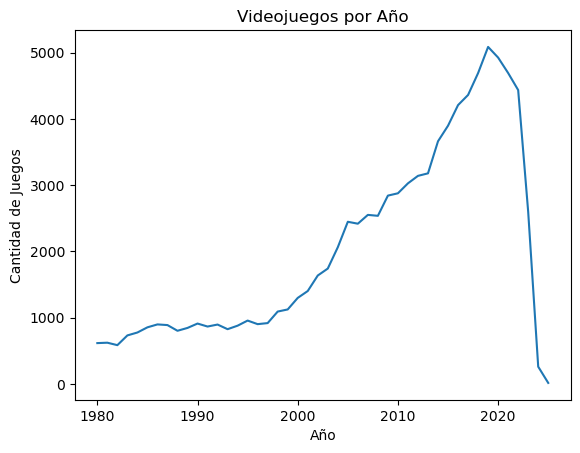

In [291]:
import matplotlib.pyplot as plt


juegos_por_ano = df_filtrado['year'].value_counts().sort_index()

plt.plot(juegos_por_ano.index, juegos_por_ano.values)
plt.xlabel('Año')
plt.ylabel('Cantidad de Juegos')
plt.title('Videojuegos por Año')
plt.show()

In [ ]:
juegos_por_ano.tail(20)

year
2006.0    2419
2007.0    2552
2008.0    2538
2009.0    2843
2010.0    2878
2011.0    3028
2012.0    3141
2013.0    3179
2014.0    3663
2015.0    3898
2016.0    4209
2017.0    4362
2018.0    4692
2019.0    5087
2020.0    4926
2021.0    4693
2022.0    4436
2023.0    2597
2024.0     261
2025.0      16
Name: count, dtype: int64

Vemos que el 2019 hubo 5087 juegos publicados, probablemente la pandemia explique la baja considerable de la publicacion de juegos

**c) (0.5 pts)** ¿Entre qué años hubo un mayor aumento de publicación de juegos de mesa según los registros de BGG?

### 3.3 Análisis de duración y complejidad (1.5 puntos)

Si bien hay muchas posibles características que podemos explorar para los juegos de mesa, esta vez nos centraremos en el tiempo de juego y la complejidad. En esta sección queremos comprender si se ha modificado notablemente la duración promedio y la percepción de complejidad de los juegos de mesa a través de los años.

**a) (0.3 pts)** Inspecciones y filtre los datos que tengan valores válidos para: tiempo mínimo de juego, tiempo máximo de juego y complejidad. En el caso de que existan "outliers", puede descartarlos, cosiderando un rango razonable para las variables anteriores. Justifique su desición.

**b) (0.2 pts)** Veremos ahora si ha cambiado la duración promedio de los juegos de mesa en nuestro rango de años seleccionado. Primero, cree una nueva columna `avg_time` en el dataset con la duración promedio supuesta para cada juego.

**c) (0.5 pts)** Grafique la duración promedio de juegos al año entre 1980 y 2025. ¿Existe alguna tendencia? Asegúrese de colocar las unidades correspondientes en sus ejes si es necesario. Comente sus resultados.

**d) (0.5 pts)** Nos interesa saber si los juegos de mesa recientes son más complejos que aquellos publicados antes de los 2000. BoardGameGeek permite evaluar la complejidad (o "weight") de un juego en una escala de 1 a 5, siendo 1 un juego "liviano" o fácil de entender, y 5 un juego "pesado" o complejo. Primero, seleccione los juegos que han sido evaluados por al menos 100 usuarios. Luego grafique la complejidad promedio de los juegos según año. Responda: ¿ha cambiado la percepción de complejidad entre juegos entre 1980 y la actualidad?

### 3.4 Análisis de categorías comunes (2 puntos)

Existe una gran diversidad de categorías de juegos de mesa. Ahora nos concentraremos en un grupo específico de ellas, con el fin de analizar cómo a cambiado la cantidad de juegos de estas clases desde 1980 hasta hoy.

**a) (0.7 pts)** ¿Cuáles son las 5 categorías más comunes en los juegos del dataset? Muestre la cantidad de juegos que hay de cada una. Puede graficar estos valores, o bien, entregar un DataFrame con sus valores.

In [301]:
categorias_comunes = df_filtrado['category'].value_counts().head(5)

print("Top 5 categorías más comunes:")
print(categorias_comunes)

categorias_df = categorias_comunes.reset_index()
categorias_df.columns = ['Categoría', 'Cantidad de Juegos']
print("\nComo DataFrame:")
print(categorias_df)


Top 5 categorías más comunes:
category
1002         4023
1009         3662
1019,1049    1686
1041         1396
1030         1251
Name: count, dtype: int64

Como DataFrame:
   Categoría  Cantidad de Juegos
0       1002                4023
1       1009                3662
2  1019,1049                1686
3       1041                1396
4       1030                1251


In [ ]:
df_category = pd.read_csv("archive/bgg_Category.csv", delimiter=',') 
fila_1000 = df_category[df_category['bgg_id'] == 1002]
print(fila_1002)

   bgg_id       name
1    1002  Card Game


In [303]:
df_category = pd.read_csv("archive/bgg_Category.csv", delimiter=',') 
fila_1009 = df_category[df_category['bgg_id'] == 1009]
print(fila_1009)

   bgg_id               name
3    1009  Abstract Strategy


In [304]:
df_category = pd.read_csv("archive/bgg_Category.csv", delimiter=',') 
fila_1019 = df_category[df_category['bgg_id'] == 1019]
print(fila_1019)

    bgg_id     name
10    1019  Wargame


In [305]:
df_category = pd.read_csv("archive/bgg_Category.csv", delimiter=',') 
fila_1041 = df_category[df_category['bgg_id'] == 1041]
print(fila_1041)

    bgg_id             name
32    1041  Children's Game


In [308]:
df_category = pd.read_csv("archive/bgg_Category.csv", delimiter=',') 
fila_1030 = df_category[df_category['bgg_id'] == 1030]
print(fila_1030)

    bgg_id        name
21    1030  Party Game


Ahora si, construyo el dataframe que me solicitan en la pregunta

In [311]:
data = {
    'bgg_id': [1002, 1009, 1019, 1041, 1030],
    'name': ['Card Game', 'Abstract Strategy', 'Wargame', "Children's Game", 'Party Game']
}

df_ejem = pd.DataFrame(data)
print(df_ejem)

   bgg_id               name
0    1002          Card Game
1    1009  Abstract Strategy
2    1019            Wargame
3    1041    Children's Game
4    1030         Party Game


**b) (0.3 pts)** Para cada una de estas 5 categorías, cree un DataFrame que contenga la cantidad de juegos en el dataset según año. Luego junte estos DataFrames en uno solo con los atributos de "Año", "Categoría" y "Cantidad".

**c) (1 pto)** Grafique, en un solo gráfico y con distintos colores, la cantidad de juegos por año según categoría. Preocúpese de ponerle etiquetas al gráfico para identificar cada categoría y una leyenda donde se muestre cada una. Comente: ¿ha habido un cambio entre los juegos más comunes en los años 80 y hoy?


### 3.5 Análisis Crítico (Bono +0.5 puntos)

¿Qué limitaciones o problemas encontraste en los datos?

Datos faltantes, datos irreales como valores de años negativo, años que van mas alla de la fecha actual ,esos fueron algunas de las conclusiones que pude encontrar al observar los datos de bggGameGeek